In [66]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score

from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Importing predefined dictionaries of hyperparameters, models and preprocess steps
PARAMS = create_params()
MODELS = create_models()
PREPROCESS = create_preprocess()

In [8]:
data = pd.read_csv("./australia.csv")

In [9]:
# Only a fraction of data for faster computation
data = data.sample(frac=0.2)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("RainTomorrow", axis=1),
    data["RainTomorrow"],
    stratify=data["RainTomorrow"],
    test_size=0.2,
    random_state=42)

In [11]:
# Tuning models
MODELS_SUMMARY = create_models_summary(MODELS, PARAMS, PREPROCESS, X_train, y_train)

creating_model:  LOG
Parameters search completed!
Cross validation on best model completed!
Mean validation score:  0.8831


creating_model:  LGBM
Parameters search completed!
Cross validation on best model completed!
Mean validation score:  0.8848


creating_model:  ADA
Parameters search completed!
Cross validation on best model completed!
Mean validation score:  0.879


creating_model:  NN
Parameters search completed!
Cross validation on best model completed!
Mean validation score:  0.8864


creating_model:  XGBOOST
Parameters search completed!
Cross validation on best model completed!
Mean validation score:  0.8844


creating_model:  HGB
Parameters search completed!
Cross validation on best model completed!
Mean validation score:  0.8837


creating_model:  RF
Parameters search completed!
Cross validation on best model completed!
Mean validation score:  0.8827


creating_model:  SVM
Parameters search completed!
Cross validation on best model completed!
Mean validation score:  0.8863


creating_model:  EXTRA
Parameters search completed!
Cross validation on best model completed!
Mean validation score:  0.8838


creating_model:  KNN
Parameters search completed!
Cross validation on best model completed!
Mean validation score:  0.8696


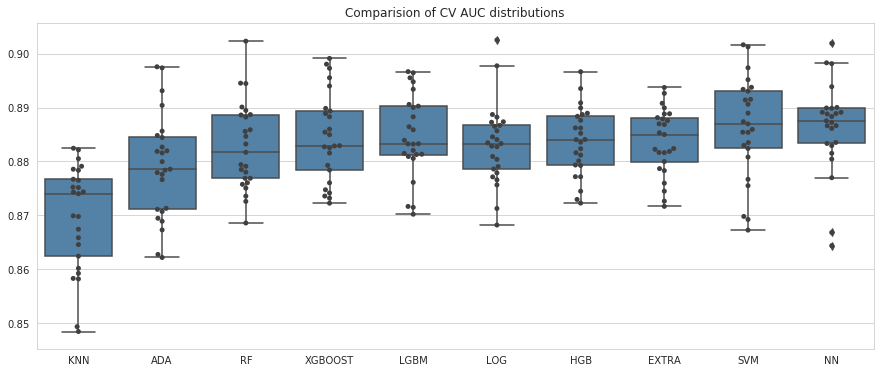

In [40]:
plot_results(MODELS_SUMMARY)

It turned out that the best model was Neural Network, but for most models distributions are comparable. <br>
Since logistic regression is the simplest model here, let's take a look at coefficients from this model.

In [44]:
best_log_reg = MODELS_SUMMARY[MODELS_SUMMARY.model_name == 'LOG']['best_model'][0]

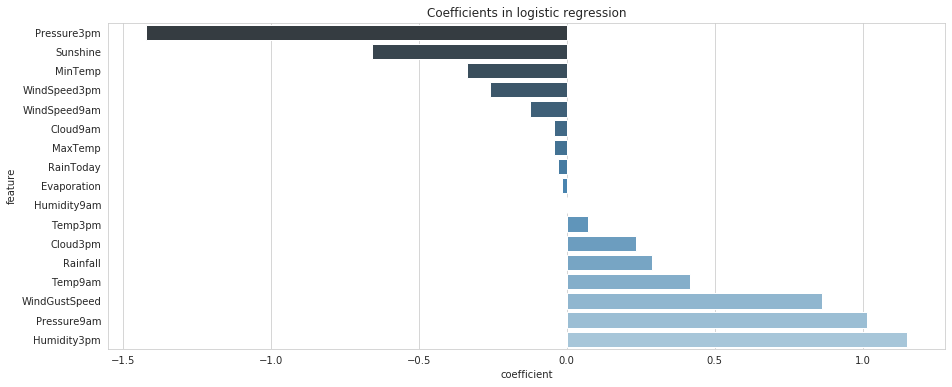

In [45]:
plot_coefficients(best_log_reg)

We can see significant diversity in coefficients values, removing some of the non important variable may help model performance and further simplify the model.

Let's see our best model performance on test data

In [61]:
best_model = MODELS_SUMMARY[MODELS_SUMMARY.model_name == 'NN']['best_model'][3]

In [62]:
y_pred = best_model.predict_proba(X_test)[:,1]

In [63]:
best_auc = roc_auc_score(y_test, y_pred)

<Figure size 576x432 with 0 Axes>

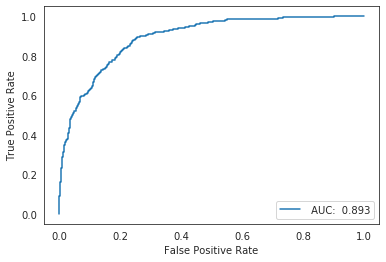

In [71]:
plt.figure(figsize=(8, 6))
plot_roc_curve(best_model, X_test, y_test, label=f" AUC:  {round(best_auc, 3)}")

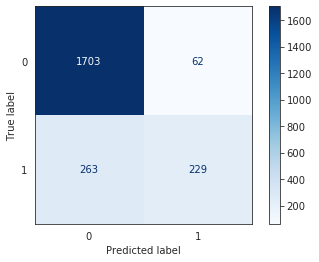

In [72]:
plot_confusion_matrix(best_model, X_test, y_test, cmap='Blues',  values_format='.0f')

AUC on test set is better than mean cross-validated AUC, so we can assume that model was not overfitted.
The biggest challenge for the model was to properly classify rainy days, probably beacue of the class imbalance.
Other metrics such as F1 score or recall might be useful in further development of the best model.